# 9. Mixture Models and EM

### *Table of Contents*

* 9.1 [K-means Clustering](#9.1-K-means-Clustering)
    * 9.1.1 [Image segmentation and compression](#9.1.1-Image-segmentation-and-compression)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prml.clustering import KMeans
from prml.datasets import load_old_faithful

# Set random seed to make deterministic
np.random.seed(0)

# Ignore zero divisions and computation involving NaN values.
np.seterr(divide="ignore", invalid="ignore")

# Enable higher resolution plots
%config InlineBackend.figure_format = 'retina'

# Enable autoreload all modules before executing code
%reload_ext autoreload
%autoreload 2

## 9.1 K-means Clustering

Consider the problem of identifying groups, or clusters, of data points in a multidimensional space. Suppose that we have a data set $\{x_1,\dots,x_N\}$. The goal is to partition the data set into $K$ clusters, for a given value of $K$. Intuitively, a cluster can be a group of data points whose inter-point distances are small compared to the distances to points outside the cluster.

We can formalize this notion by introducing a set of D-dimensional vectors $\boldsymbol\mu_k$. Each such vector is a prototype associated with the $k$th cluster, essentially representing the centres of the clusters. Then, the goal is then to find an assignment of data points to clusters, and a set of vectors $\boldsymbol\mu_k$, such that the sum of the squares of the distances of each data point to its closest vector $\boldsymbol\mu_k$ is a minimum.

We can then define an objective function, sometimes called a distortion measure, given by

$$
J = \sum_{n=1}^N\sum_{k=1}^K r_{nk}||\mathbf{x}_n - \boldsymbol\mu_k||_2^2
$$

where $r_{nk} \in \{0, 1\}$ are binary indicator variables, describing which of the $K$ clusters the data point $x_n$ is assigned. The objective function represents the sum of the squares of the distances of each data point to its assigned cluster center $\boldsymbol\mu_k$. Thus, the goal is to find values for the $\{r_{nk}\}$ and the ${\boldsymbol\mu_k}$ that minimize $J$.

**K-means algorithm:**
> This can be achieved using an iterative procedure involving two successive steps. In the first phase we minimize $J$ with respect to the $r_{nk}$, keeping the $\boldsymbol\mu_k$ fixed. In the second phase we minimize $J$ with respect to the $\boldsymbol\mu_k$, keeping $r_{nk}$ fixed. These two stages are then repeated until convergence. We shall see that these two stages of updating $r_{nk}$ and updating $\boldsymbol\mu_k$ correspond respectively to the E (expectation) and M (maximization) steps of the EM algorithm.

Consider the determination of the $r_{nk}$. Because $J$ is a linear function of $r_{nk}$, the optimization gives a closed form solution. The $n$ terms are independent and so we optimize for each $n$ separately by choosing $r_{nk}$ to be 1 for whichever value of $k$ gives the minimum value of $||\mathbf{x}_n - \boldsymbol\mu_k||_2^2$. In other words, we simply assign each data point to its closest cluster centre or more formally,

$$
r_{nk} = 
\begin{cases}
1 & \text{if} \; k = \argmin_j ||\mathbf{x}_n - \boldsymbol\mu_j||_2^2 \\
0 & \text{otherwise}
\end{cases}
$$

Then, consider the optimization of $\boldsymbol\mu_k$, while keeping $r_{nk}$ fixed. The objective function is a quadratic function of $\boldsymbol\mu_k$, and it can be minimized by setting its
derivative with respect to $\boldsymbol\mu_k$ to zero giving,

$$
\begin{aligned}
& \frac{\partial J}{\partial\boldsymbol\mu_k} = \mathbf{0} \Leftrightarrow \\
& \frac{\partial}{\partial\boldsymbol\mu_k} \sum_{n=1}^N\sum_{k=1}^K r_{nk}||\mathbf{x}_n - \boldsymbol\mu_k||_2^2 = \mathbf{0} \Leftrightarrow \\
& 2 \sum_{n=1}^N r_{nk}(\mathbf{x}_n - \boldsymbol\mu_k) = \mathbf{0} \Leftrightarrow \\
& \sum_{n=1}^N r_{nk}\mathbf{x}_n - \sum_{n=1}^N r_{nk}\boldsymbol\mu_k = \mathbf{0} \Leftrightarrow \\
& \sum_{n=1}^N r_{nk}\mathbf{x}_n = \sum_{n=1}^N r_{nk}\boldsymbol\mu_k \Leftrightarrow \\
& \boldsymbol\mu_k = \frac{\sum_{n=1}^N r_{nk}\mathbf{x}_n}{\sum_{n=1}^N r_{nk}}
\end{aligned}
$$

The denominator is equal to the number of points assigned to cluster $k$, and thus, $\boldsymbol\mu_k$ equal to the mean of all of the data points $\mathbf{x}_n$ assigned to cluster $k$. For this reason, the procedure is known as the $K$-means algorithm.

> Because each phase reduces the value of the objective function, convergence of the algorithm is assured. However, keep in mind, that it may converge to a local rather than global minimum.

Below the $K$-means algorithm is applied on the Old Faithful data set:

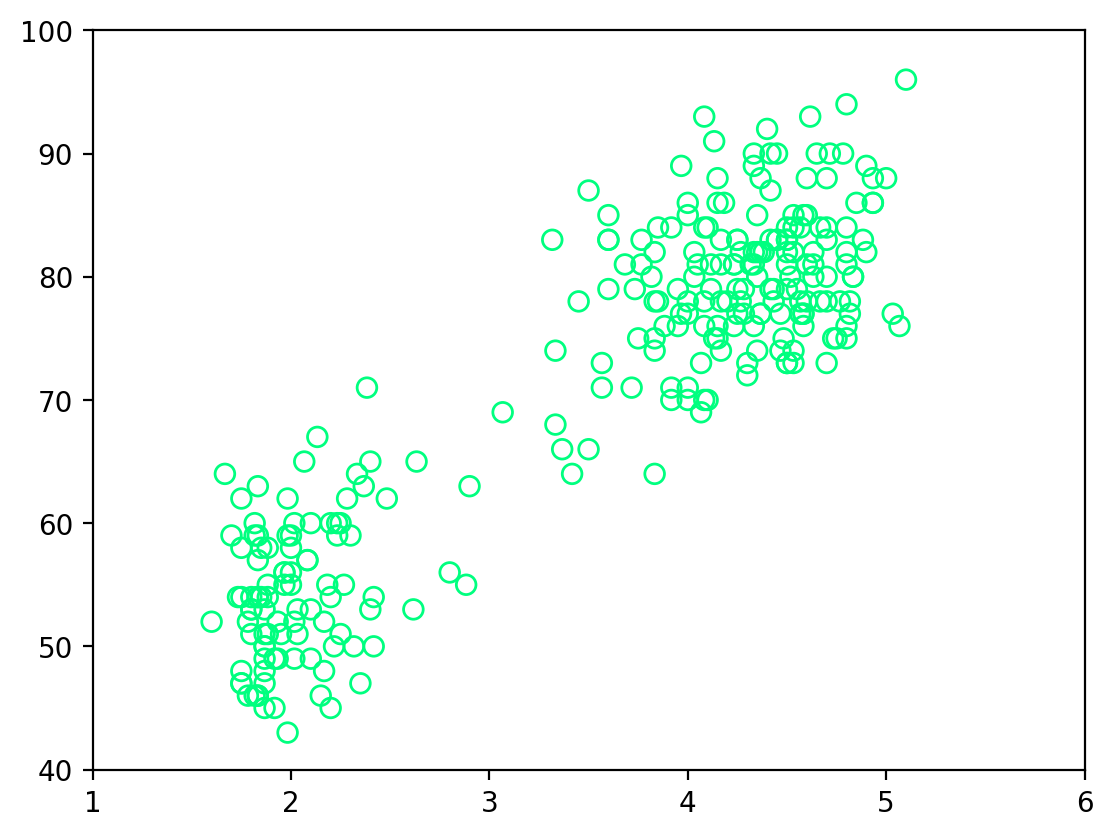

In [2]:
old_faithful = load_old_faithful()
plt.scatter(old_faithful[:, :1], old_faithful[:, 1:2], color="springgreen", facecolors="none", s=50)
plt.xlim(1, 6)
plt.ylim(40, 100)
plt.show()

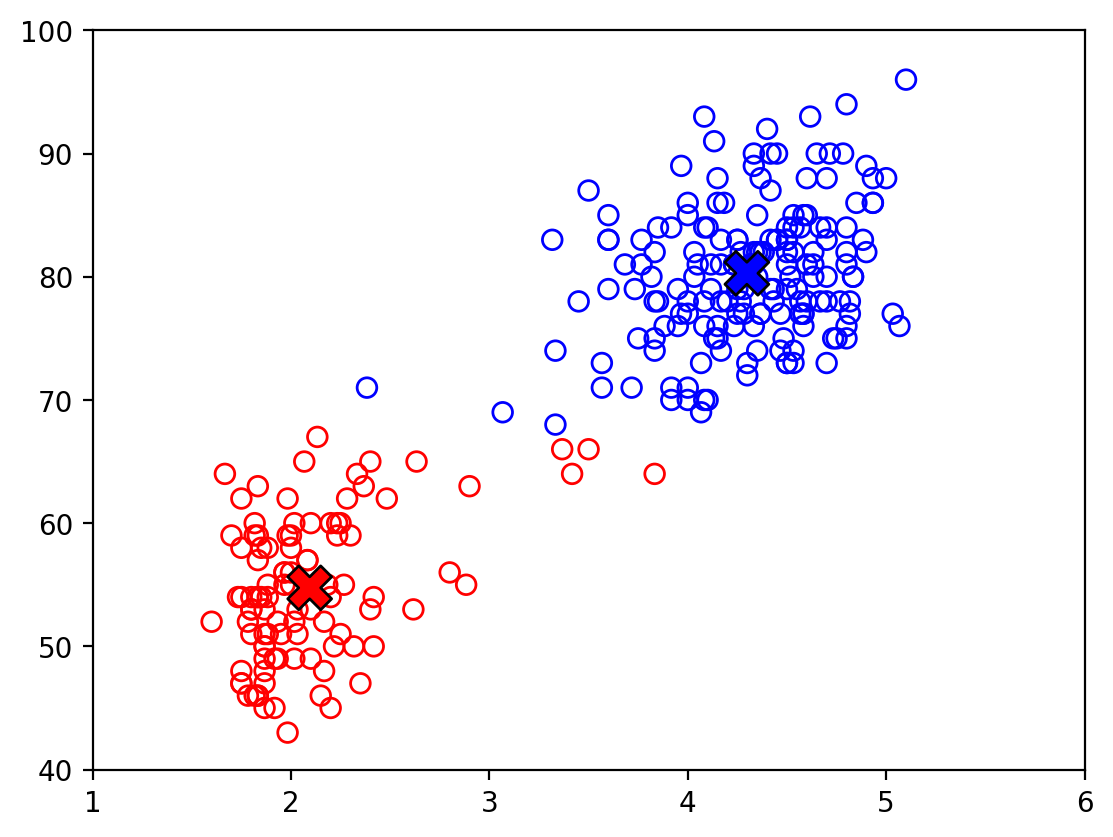

In [195]:
model = KMeans(2)
model.fit(old_faithful, n_iter=10)
classes = model.predict(old_faithful)

plt.scatter(
    old_faithful[:, :1], old_faithful[:, 1:2], edgecolors=np.where(classes == 0, "blue", "red"), facecolors="none", s=50
)
plt.scatter(model.centers[:, 0], model.centers[:, 1], color=["blue", "red"], marker="X", s=250, edgecolors="black")
plt.xlim(1, 6)
plt.ylim(40, 100)
plt.show()

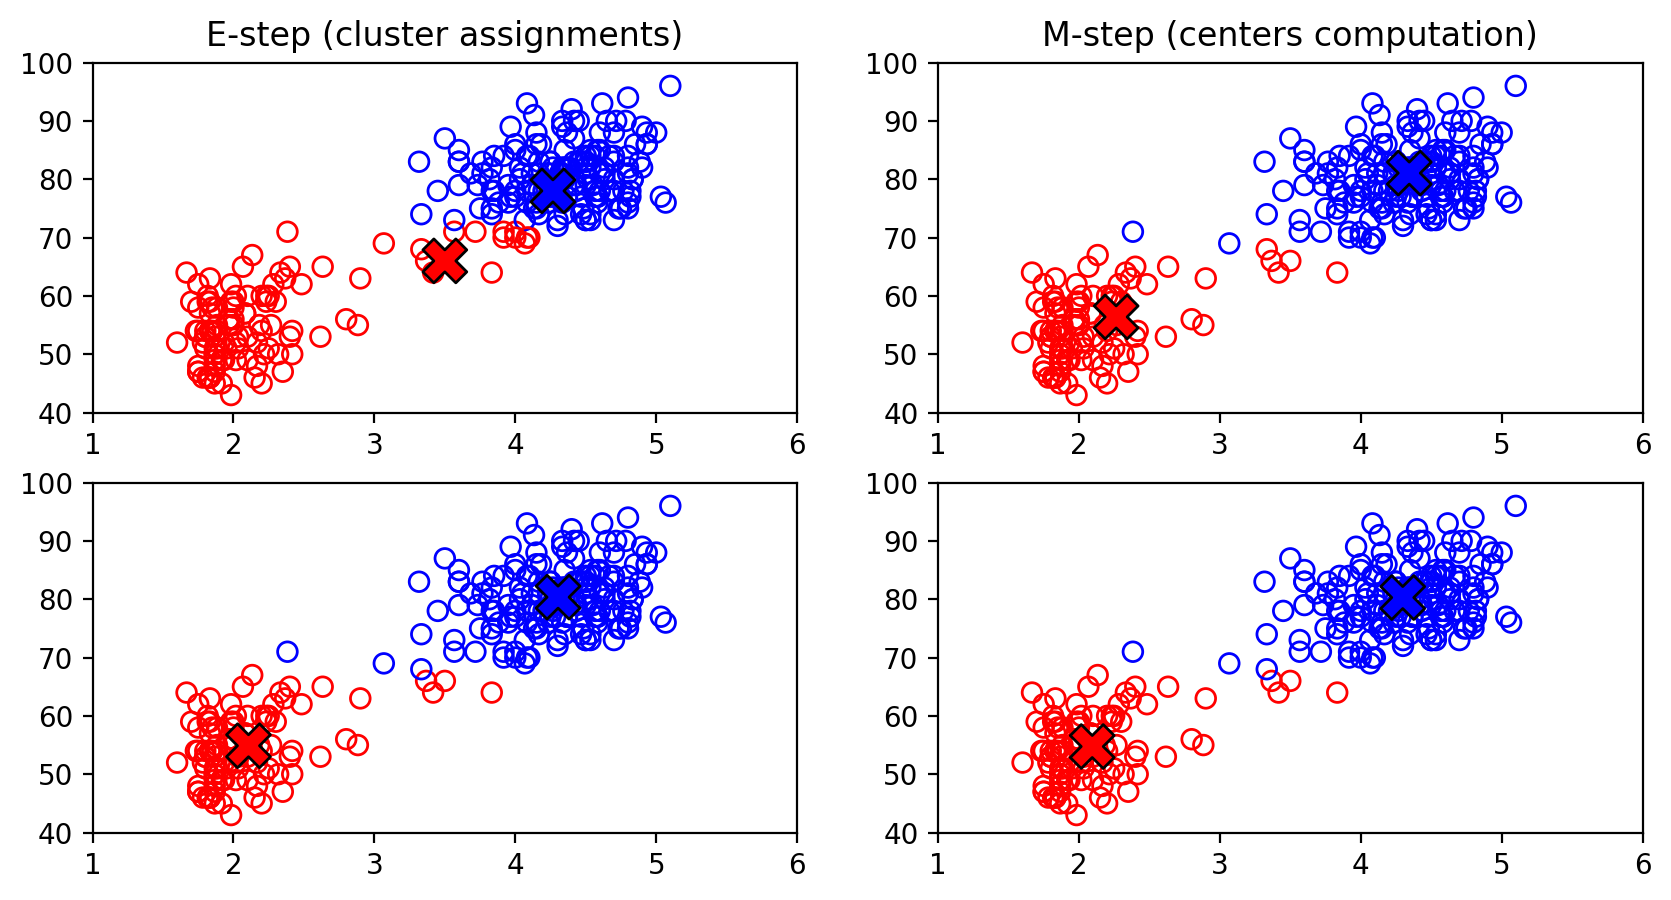

In [197]:
plt.figure(figsize=(10, 5))

# even are E-steps and odd are M-steps
for i, (centers, assignments) in enumerate(model.history):
    plt.subplot(2, 2, i + 1)
    plt.scatter(
        old_faithful[:, :1],
        old_faithful[:, 1:2],
        edgecolors=np.where(assignments == 0, "blue", "red"),
        facecolors="none",
        s=50,
    )
    plt.scatter(centers[:, 0], centers[:, 1], color=["blue", "red"], marker="X", s=250, edgecolors="black")
    plt.xlim(1, 6)
    plt.ylim(40, 100)

    if i == 0:
        plt.title("E-step (cluster assignments)")
    elif i == 1:
        plt.title("M-step (centers computation)")

The initial values for the cluster centres are choosen to be equal to a random subset of $K$ data points. It is also worth noting that the $K$-means algorithm itself is often used to initialize the parameters in a Gaussian mixture model before applying the EM algorithm.

> The implementation of the $K$-means algorithm as discussed here can be relatively slow, because for the E-step it is necessary to compute the Euclidean distance between every prototype vector and every data point. Several schemes have been proposed for speeding up $K$-means, some of which are based on precomputing a data structure (e.g., k-d tree) such that nearby points are in the same subtree. Other approaches make use of the triangle inequality for distances, thereby avoiding unnecessary distance calculations.

#### Online K-means

The batch version of K-means requires for the whole dataset to be used for updating the prototype vectors. We can also derive an on-line stochastic algorithm by applying the Robbins-Monro procedure to the problem of finding the roots of the regression function given by the derivatives of $J$ with respect to $\boldsymbol\mu_k$. Decomposing the batch objective function, we obtain,

$$
J_N = J_{N-1} + \sum_{k=1}^K r_{Nk}||\mathbf{x}_N - \boldsymbol\mu_k||_2^2
$$

Therefore, in the E-step, the $N$-th data point is still assigned to the closest center. Suppose that is $\boldsymbol\mu_m$. Thus, the expression $J_N$ becomes,

$$
J_N = J_{N-1} + ||\mathbf{x}_N - \boldsymbol\mu_m||_2^2
$$

For the M-step, setting the derivative of $J_N$ with respect to $\boldsymbol\mu_k$ equal to $\mathbf{0}$, gives,

$$
\begin{aligned}
\frac{\partial J}{\partial\boldsymbol\mu_k} = \mathbf{0} & \Leftrightarrow
\frac{\partial J_{N-1}}{\partial\boldsymbol\mu_k} + \frac{\partial ||\mathbf{x}_N - \boldsymbol\mu_m||_2^2}{\partial\boldsymbol\mu_k} = \mathbf{0} \\
& \overset{k=m}{\Leftrightarrow} \frac{\partial J_{N-1}}{\partial\boldsymbol\mu_m} + \frac{\partial ||\mathbf{x}_N - \boldsymbol\mu_m||_2^2}{\partial\boldsymbol\mu_m} = \mathbf{0} \\
& \Leftrightarrow 2 \sum_{n=1}^{N-1} r_{nm}(\mathbf{x}_n - \boldsymbol\mu_m) + 2(\mathbf{x}_N - \boldsymbol\mu_m) = \mathbf{0} \\
& \Leftrightarrow \sum_{n=1}^{N-1} r_{nm}(\mathbf{x}_n - \boldsymbol\mu_m) + \mathbf{x}_N - \boldsymbol\mu_m = \mathbf{0} \\
& \Leftrightarrow \sum_{n=1}^{N-1} r_{nm}\mathbf{x}_n - \sum_{n=1}^{N-1} r_{nm}\boldsymbol\mu_m + \mathbf{x}_N - \boldsymbol\mu_m = \mathbf{0} \\
& \Leftrightarrow \sum_{n=1}^{N-1} r_{nm}\mathbf{x}_n + \mathbf{x}_N = \sum_{n=1}^{N-1} r_{nm}\boldsymbol\mu_m + \boldsymbol\mu_m \\
& \Leftrightarrow \sum_{n=1}^{N-1} r_{nm}\mathbf{x}_n + \mathbf{x}_N = \boldsymbol\mu_m\Big(\sum_{n=1}^{N-1} r_{nm} + 1\Big) \\
& \Leftrightarrow \boldsymbol\mu_m = \frac{\sum_{n=1}^{N-1} r_{nm}\mathbf{x}_n + \mathbf{x}_N}{\sum_{n=1}^{N-1} r_{nm} + 1}
\end{aligned}
$$

Then, we may further decompose the update formula as follows,

$$
\begin{aligned}
\boldsymbol\mu_m^{(\tau)} &= \frac{\sum_{n=1}^{N-1} r_{nm}\mathbf{x}_n + \mathbf{x}_N}{\sum_{n=1}^{N-1} r_{nm} + 1} \\
&= \frac{
    \frac{\sum_{n=1}^{N-1} r_{nm}\mathbf{x}_n}{\sum_{n=1}^{N-1} r_{nm}} + \frac{\mathbf{x}_N}{\sum_{n=1}^{N-1} r_{nm}}
}{
    1 + \frac{1}{\sum_{n=1}^{N-1} r_{nm}}
} \\
&= \frac{
   \boldsymbol\mu_m^{(\tau-1)} + \frac{\mathbf{x}_N}{\sum_{n=1}^{N-1} r_{nm}}
}{
    1 + \frac{1}{\sum_{n=1}^{N-1} r_{nm}}
} \\
&= \boldsymbol\mu_m^{(\tau-1)} + 
\frac{
   \frac{\mathbf{x}_N}{\sum_{n=1}^{N-1} r_{nm}} - \frac{\boldsymbol\mu_m^{(\tau-1)}}{\sum_{n=1}^{N-1} r_{nm}}
}{
    1 + \frac{1}{\sum_{n=1}^{N-1} r_{nm}}
} \\
&= \boldsymbol\mu_m^{(\tau-1)} + 
\frac{
   \mathbf{x}_N - \boldsymbol\mu_m^{(\tau-1)}
}{
    1 + \frac{1}{\sum_{n=1}^{N-1} r_{nm}}
}
\end{aligned}
$$

This leads to a sequential update in which, for each data point $\mathbf{x}_n$ in turn, we update the nearest prototype $\boldsymbol\mu_k$ using,

$$
\boldsymbol\mu_k^{(\tau)} = \boldsymbol\mu_k^{(\tau-1)} + \eta_n\Big(\mathbf{x}_n - \boldsymbol\mu_k^{(\tau-1)}\Big)
$$

where $\eta_n$ is a learning rate parameter that decreases monotonically as more data points are accumulated.

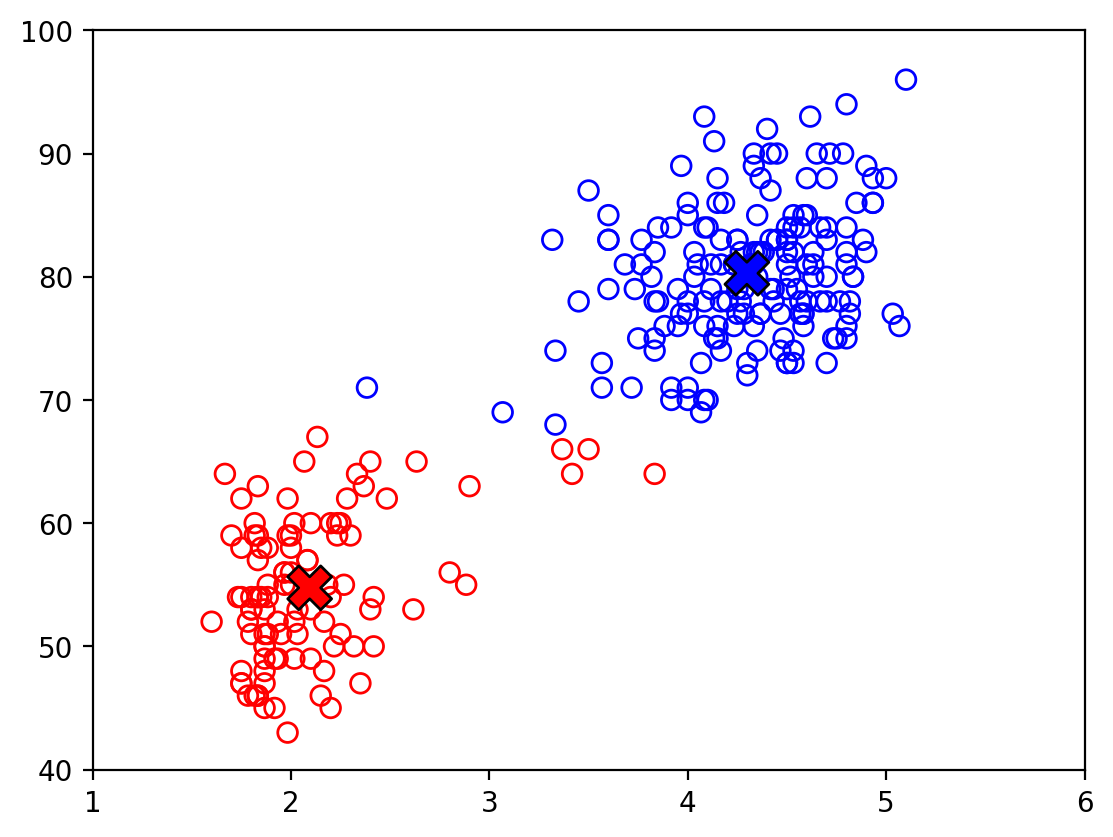

In [198]:
model = KMeans(2)

indices = list(range(len(old_faithful)))
np.random.shuffle(indices)
for i in indices:
    model.update(old_faithful[i, :])

classes = model.predict(old_faithful)

plt.scatter(
    old_faithful[:, :1], old_faithful[:, 1:2], edgecolors=np.where(classes == 0, "blue", "red"), facecolors="none", s=50
)
plt.scatter(model.centers[:, 0], model.centers[:, 1], color=["blue", "red"], marker="X", s=250, edgecolors="black")
plt.xlim(1, 6)
plt.ylim(40, 100)
plt.show()

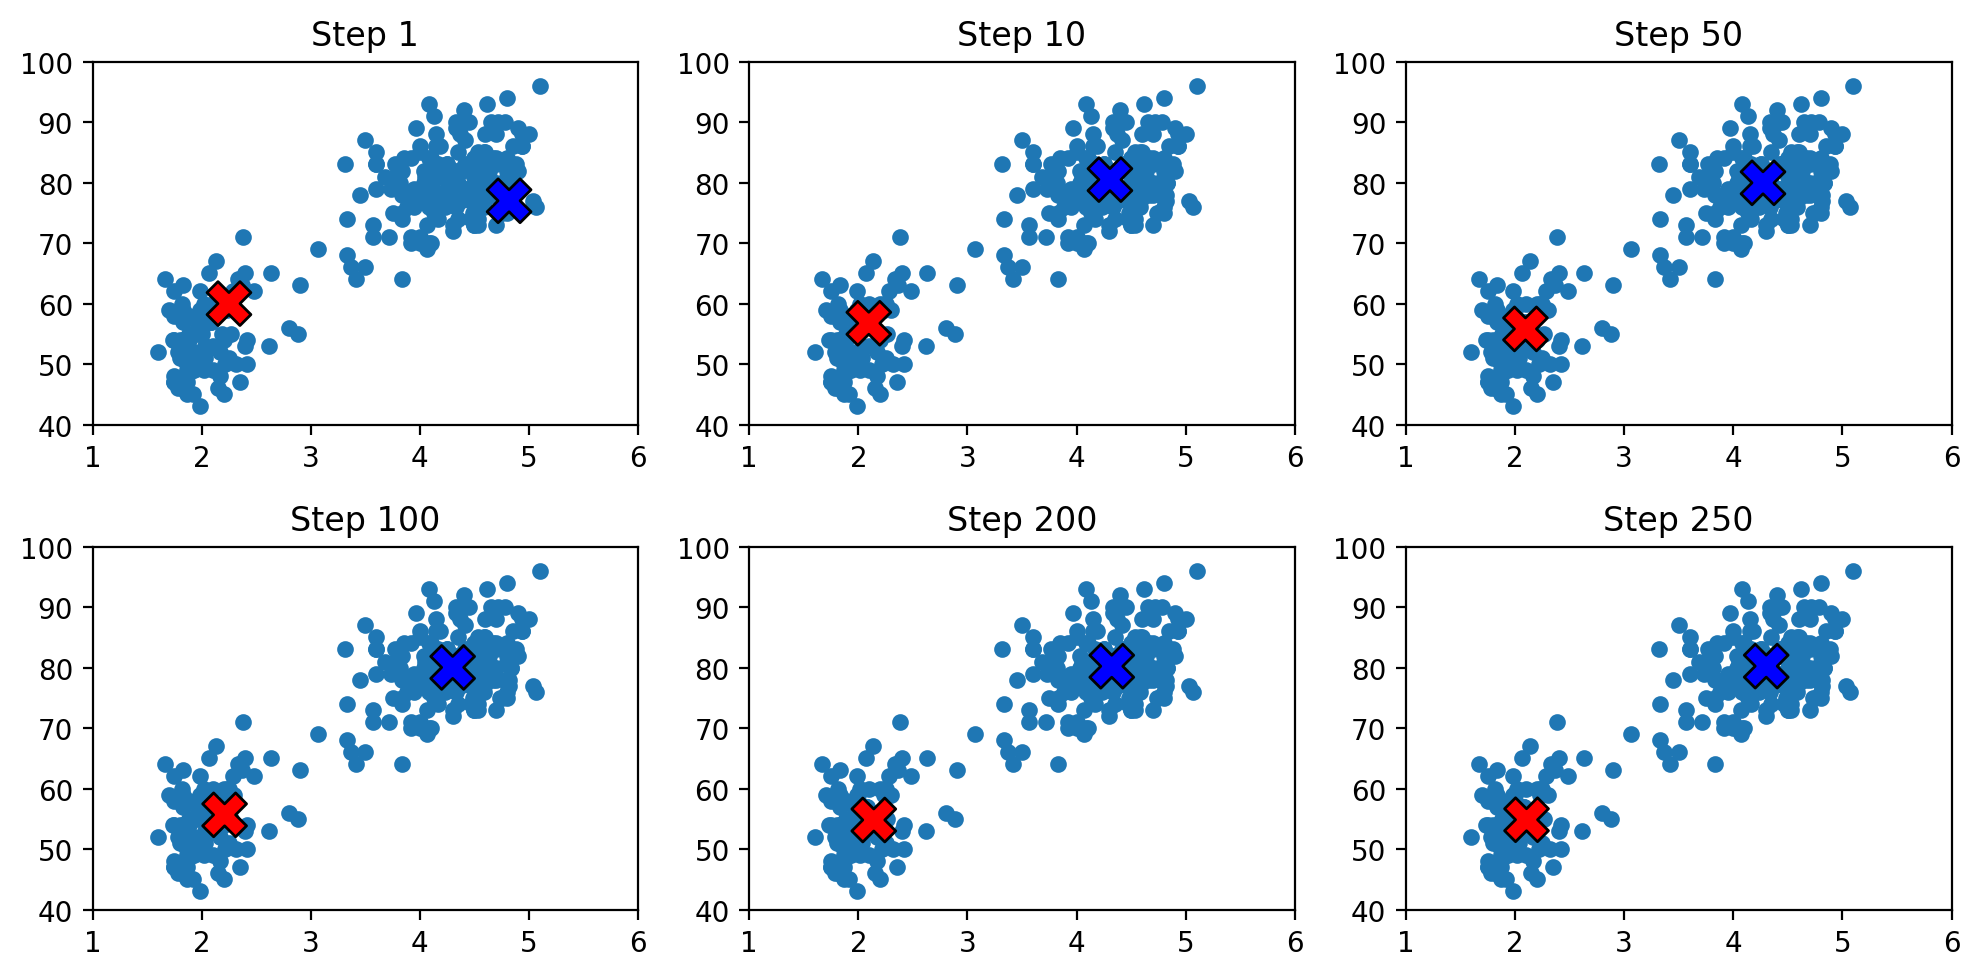

In [199]:
plt.figure(figsize=(10, 5))

plot_idx = 0
for i, (centers, assignments) in enumerate(model.history):
    if i in [1, 10, 50, 100, 200, 250]:
        plot_idx += 1
        plt.subplot(2, 3, plot_idx)
        plt.scatter(
            old_faithful[:, :1],
            old_faithful[:, 1:2],
            s=25,
        )
        plt.scatter(centers[:, 0], centers[:, 1], color=["blue", "red"], marker="X", s=250, edgecolors="black")
        plt.xlim(1, 6)
        plt.ylim(40, 100)
        plt.title(f"Step {i}")
        plt.tight_layout()

#### K-medoids

The K-means algorithm is typically based on the squared Euclidean distance for measuring the distance between a data point and a prototype vector. This limits the type of data variables that can be considered (is inappropriate for cases where some or all of the variables represent categorical labels for instance), but it also makes the determination of the cluster means non-robust to outliers. K-means algorithm can be generalized by introducing a more general dissimilarity measure $\mathcal{V}(\mathbf{x}, \mathbf{x}')$ and then minimizing the following distortion measure,

$$
\tilde{J} = \sum_{n=1}^N\sum_{m=1}^M r_{nk}\mathcal{V}(\mathbf{x}_n, \boldsymbol\mu_k )
$$

which gives the $K$-medoids algorithm. The E-step again involves, for given cluster prototypes μk, assigning each data point to the cluster for which the dissimilarity to the corresponding prototype is smallest. The computational cost of this is O(KN), as is the case for the standard K-means algorithm. For a general choice of dissimilarity measure, the M step is potentially more complex than for K-means, and so it is common to restrict each cluster prototype to be equal to one of the data vectors assigned to that cluster, as this allows the algorithm to be implemented for any choice of dissimilarity measure V(·, ·) so long as it can be readily evaluated. Thus, the M step involves, for each cluster $k$, a discrete search over the $Nk$ points assigned to that
cluster, which requires O(N^2k) evaluations of V(·, ·).

> Note that the $K$-means algorithm assigns every data point uniquely to one, and only one, of the clusters. However, there may be some data points that lie roughly midway between cluster centres. In this case, it is not clear that the hard assignment to the nearest cluster is the most appropriate. By adopting a probabilistic approach, we obtain *soft* assignments of data points to clusters, reflecting the level of uncertainty over the most appropriate assignment. This probabilistic formulation brings numerous benefits.

### 9.1.1 Image segmentation and compression